# CONCEPT : WHAT IS THE STATUS OF CITY TRAIN STASION NOW ! 

 *Credit row data from https://gobestimate.com/data-detail/City-Train-Station

In [165]:
import os
import numpy as np
import pandas as pd
import pickle
from datetime import datetime
import matplotlib.pyplot as plt

In [146]:
# Data collection and cleansing

data = pd.read_csv(r'C:\opendata_train_station.csv')
data.columns = ('Row','GID','Line no.','Railway','Line type (Thai)','Line type(Eng)','Status','Line name (Thai)','Line name (Eng)','Staion (Thai)'
,'Staion (Eng)','Latitude','Longitude','Province (Thai)','Province (Eng)','District (Thai)','District (Eng)','Sub-district (Thai)'
,'Sub-district (Eng)','Date')
data.head()

,Row,GID,Line no.,Railway,Line type (Thai),Line type(Eng),Status,Line name (Thai),Line name (Eng),Staion (Thai),Staion (Eng),Latitude,Longitude,Province (Thai),Province (Eng),District (Thai),District (Eng),Sub-district (Thai),Sub-district (Eng),Date
0,215,121,4,รถไฟฟ้า,เอ็มอาร์ที,MRT,ปัจจุบัน,สายสีม่วง,Purple Line,ศูนย์ราชการนนทบุรี,Nonthaburi Civic Center,13.859902,100.515505,นนทบุรี,NONTHABURI,เมืองนนทบุรี,MUEANG NONTHABURI,ตลาดขวัญ,TALAT KHWAN,2022-08-31
1,262,166,6,รถไฟฟ้า,เอสอาร์ที,SRT,อนาคต,สายสีแดงอ่อน,Light Red Line,ศาลายา,Sala Ya,13.802630,100.324420,นครปฐม,Nakhon Pathom,พุทธมณฑล,Phutthamonthon,ศาลายา,Salaya,2022-08-31
2,209,1,1,รถไฟฟ้า,บีทีเอส,BTS,อนาคต,สายสุขุมวิท,Sukhumvit Line,วงแหวนรอบนอกตะวันออก,Wongwaen Rop Nok Tawan-ok,13.933845,100.714462,กรุงเทพมหานคร,BANGKOK,คลองสามวา,KHLONG SAM WA,สามวาตะวันตก,SAM WA TAWAN TOK,2022-08-31
3,80,126,4,รถไฟฟ้า,เอ็มอาร์ที,MRT,ปัจจุบัน,สายสีม่วง,Purple Line,บางรักน้อย-ท่าอิฐ,Bang Rak Noi Tha It,13.873221,100.459721,นนทบุรี,NONTHABURI,เมืองนนทบุรี,MUEANG NONTHABURI,ไทรม้า,SAI MA,2022-08-31
4,159,27,1,รถไฟฟ้า,บีทีเอส,BTS,ปัจจุบัน,สายสุขุมวิท,Sukhumvit Line,ราชเทวี,Ratchathewi,13.751861,100.531570,กรุงเทพมหานคร,BANGKOK,ราชเทวี,RATCHATHEWI,ถนนเพชรบุรี,THANON PHET BURI,2022-08-31


In [147]:
# Check null in dataframe
data.isna().sum().sum()

0

In [150]:
# Rename column and clear format data
data['Line type (Eng)'] = data['Line type(Eng)'].str.upper()
data['Province (Eng)'] = data['Province (Eng)'].str.title()
data['District (Eng)'] = data['District (Eng)'].str.title()
data['Sub-district (Eng)'] = data['Sub-district (Eng)'].str.title()
data['Status (Eng)'] = np.where(data['Status']== 'ปัจจุบัน', 'Present', 'Future')

data.head()

,Row,GID,Line no.,Railway,Line type (Thai),Line type(Eng),Status,Line name (Thai),Line name (Eng),Staion (Thai),...,Longitude,Province (Thai),Province (Eng),District (Thai),District (Eng),Sub-district (Thai),Sub-district (Eng),Date,Status (Eng),Line type (Eng)
0,215,121,4,รถไฟฟ้า,เอ็มอาร์ที,MRT,ปัจจุบัน,สายสีม่วง,Purple Line,ศูนย์ราชการนนทบุรี,...,100.515505,นนทบุรี,Nonthaburi,เมืองนนทบุรี,Mueang Nonthaburi,ตลาดขวัญ,Talat Khwan,2022-08-31,Present,MRT
1,262,166,6,รถไฟฟ้า,เอสอาร์ที,SRT,อนาคต,สายสีแดงอ่อน,Light Red Line,ศาลายา,...,100.324420,นครปฐม,Nakhon Pathom,พุทธมณฑล,Phutthamonthon,ศาลายา,Salaya,2022-08-31,Future,SRT
2,209,1,1,รถไฟฟ้า,บีทีเอส,BTS,อนาคต,สายสุขุมวิท,Sukhumvit Line,วงแหวนรอบนอกตะวันออก,...,100.714462,กรุงเทพมหานคร,Bangkok,คลองสามวา,Khlong Sam Wa,สามวาตะวันตก,Sam Wa Tawan Tok,2022-08-31,Future,BTS
3,80,126,4,รถไฟฟ้า,เอ็มอาร์ที,MRT,ปัจจุบัน,สายสีม่วง,Purple Line,บางรักน้อย-ท่าอิฐ,...,100.459721,นนทบุรี,Nonthaburi,เมืองนนทบุรี,Mueang Nonthaburi,ไทรม้า,Sai Ma,2022-08-31,Present,MRT
4,159,27,1,รถไฟฟ้า,บีทีเอส,BTS,ปัจจุบัน,สายสุขุมวิท,Sukhumvit Line,ราชเทวี,...,100.531570,กรุงเทพมหานคร,Bangkok,ราชเทวี,Ratchathewi,ถนนเพชรบุรี,Thanon Phet Buri,2022-08-31,Present,BTS


In [151]:
# Check unique data
n = data.nunique(axis=0)
n

Row                    318
GID                    318
Line no.                13
Railway                  1
Line type (Thai)         5
Line type(Eng)           4
Status                   2
Line name (Thai)        13
Line name (Eng)         13
Staion (Thai)          269
Staion (Eng)           275
Latitude               318
Longitude              318
Province (Thai)          6
Province (Eng)           6
District (Thai)         58
District (Eng)          59
Sub-district (Thai)    126
Sub-district (Eng)     125
Date                     1
Status (Eng)             2
Line type (Eng)          4
dtype: int64

In [156]:
by_line_type = data.groupby('Line type(Eng)').nunique()
by_line_type_count = by_line_type['Row']
df_line_type = by_line_type_count.to_frame().reset_index(drop=False)

print ('Summary count of city train (by type) as below \n',df_line_type)


Summary count of city train (by type) as below 
       Line type(Eng)  Row
0  AIRPORT-RAIL-LINK    7
1                BTS  107
2                MRT  147
3                SRT   57


In [157]:
by_province = data.groupby('Province (Eng)').nunique()
by_province_count = by_province['Line name (Eng)']
df_provice = by_province_count.to_frame().reset_index(drop=False)

print ('Summary count of city train (by line name (Eng)) in each provice as below \n',df_provice)


Summary count of city train (by line name (Eng)) in each provice as below 
   Province (Eng)  Line name (Eng)
0        Bangkok               13
1  Nakhon Pathom                1
2     Nonthaburi                2
3   Pathum Thani                2
4   Samut Prakan                3
5   Samut Sakhon                2


In [166]:
by_status_present = data[data['Status (Eng)']=='Present']
by_status_present_province = by_status_present.groupby('Province (Eng)').count()
df_by_status_present_province = by_status_present_province['Status (Eng)'].to_frame().reset_index(drop=False)

print ('Summary count of present city train in each provice as below \n',df_by_status_present_province)


Summary count of present city train in each provice as below 
   Province (Eng)  Status (Eng)
0        Bangkok           134
1     Nonthaburi            22
2   Pathum Thani             2
3   Samut Prakan            13


In [170]:
cross_tab_prop = pd.crosstab(index=data['Province (Eng)'],
                             columns=data['Status (Eng)'],
                             normalize="index")
cross_tab_prop

Status (Eng),Future,Present
Province (Eng),,
Bangkok,0.488550,0.511450
Nakhon Pathom,1.000000,0.000000
Nonthaburi,0.043478,0.956522
Pathum Thani,0.714286,0.285714
Samut Prakan,0.350000,0.650000
Samut Sakhon,1.000000,0.000000


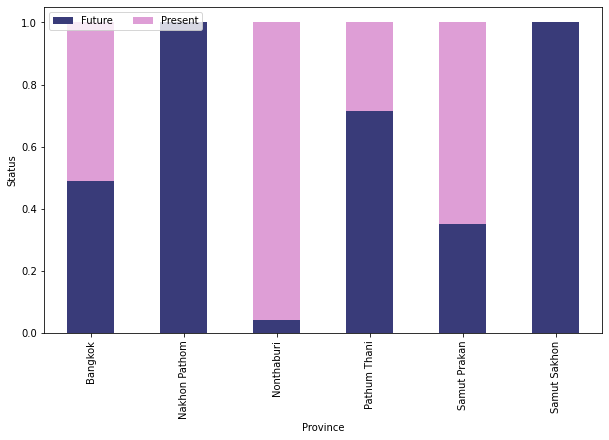

In [179]:
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab20b', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Province")
plt.ylabel("Status")
plt.show()

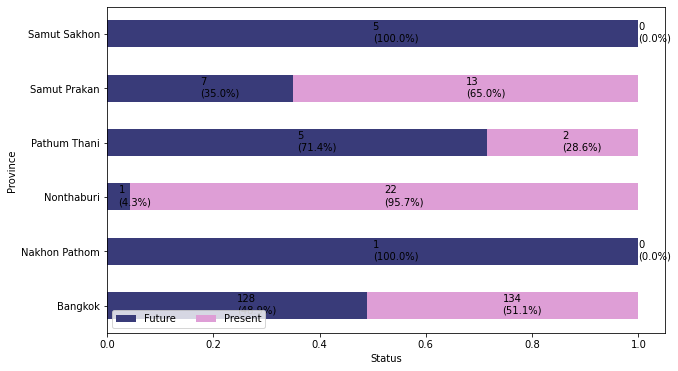

In [192]:
cross_tab = pd.crosstab(index=data['Province (Eng)'],
                        columns=data['Status (Eng)'])


cross_tab_prop.plot(kind='barh', 
                        stacked=True, 
                        colormap='tab20b', 
                        figsize=(10, 6))

plt.legend(loc="lower left", ncol=2)
plt.ylabel("Province")
plt.xlabel("Status")


for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, count, y_loc) in zip(cross_tab_prop.loc[x],
                                          cross_tab.loc[x],
                                          cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=(y_loc - proportion) + (proportion/2),
                 y=n - 0.14,
                 s=f'{count}\n({np.round(proportion*100, 1)}%)', 
                 color="black",
                 fontsize=10,
                 fontweight="normal")

plt.show()